In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
data = pd.read_csv('월별공급량및비중all.csv')
data["ID"] = pd.date_range("1996-01-01", "2020-12-01", freq="MS")
data

,YEAR,MONTH,도시가스(톤)_민수용,도시가스(톤)_산업용,도시가스(톤)_총합(민수용+산업용),민수용비중,산업용비중,ID
0,1996,1,605519.0,83809.0,689328.0,0.87842,0.12158,1996-01-01
1,1996,2,566323.0,70427.0,636750.0,0.88940,0.11060,1996-02-01
2,1996,3,477514.0,62652.0,540166.0,0.88401,0.11599,1996-03-01
3,1996,4,337794.0,47050.0,384844.0,0.87774,0.12226,1996-04-01
4,1996,5,184522.0,30709.0,215231.0,0.85732,0.14268,1996-05-01
...,...,...,...,...,...,...,...,...
295,2020,8,398661.0,457970.0,856631.0,0.46538,0.53462,2020-08-01
296,2020,9,380235.0,525619.0,905853.0,0.41975,0.58025,2020-09-01
297,2020,10,616682.0,600890.0,1217571.0,0.50649,0.49352,2020-10-01
298,2020,11,1093747.0,665901.0,1759648.0,0.62157,0.37843,2020-11-01


In [27]:
ind = data["도시가스(톤)_산업용"]
ind.index = data["ID"]
ind

ID
1996-01-01     83809.0
1996-02-01     70427.0
1996-03-01     62652.0
1996-04-01     47050.0
1996-05-01     30709.0
                ...   
2020-08-01    457970.0
2020-09-01    525619.0
2020-10-01    600890.0
2020-11-01    665901.0
2020-12-01    811928.0
Name: 도시가스(톤)_산업용, Length: 300, dtype: float64

In [28]:
ind = ind.to_frame()
ind.columns=['gas']
ind

,gas
ID,
1996-01-01,83809.0
1996-02-01,70427.0
1996-03-01,62652.0
1996-04-01,47050.0
1996-05-01,30709.0
...,...
2020-08-01,457970.0
2020-09-01,525619.0
2020-10-01,600890.0


array([<AxesSubplot:xlabel='ID'>], dtype=object)

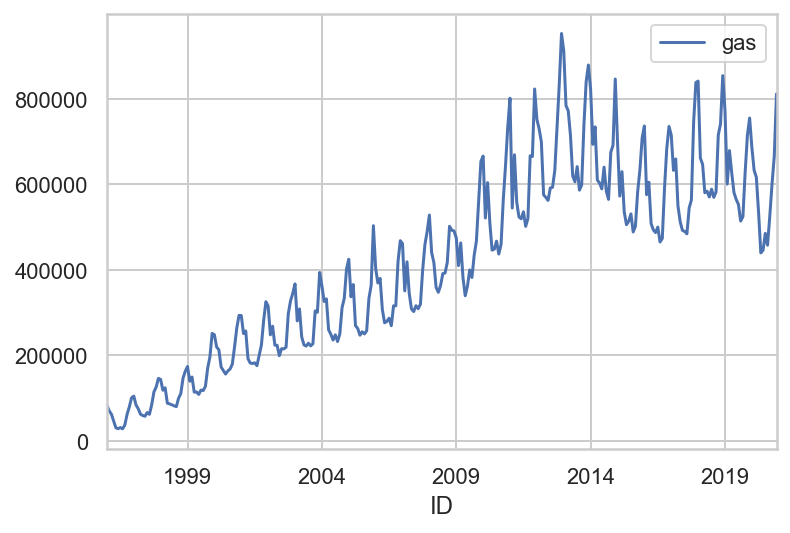

In [29]:
ind.plot(subplots=True)

In [30]:
from sklearn.model_selection import train_test_split
gas_train, gas_test = train_test_split(ind['gas'], test_size=0.1, shuffle=False)
print(gas_train, gas_test)

ID
1996-01-01     83809.0
1996-02-01     70427.0
1996-03-01     62652.0
1996-04-01     47050.0
1996-05-01     30709.0
                ...   
2018-02-01    661919.0
2018-03-01    647226.0
2018-04-01    580667.0
2018-05-01    584369.0
2018-06-01    570856.0
Name: gas, Length: 270, dtype: float64 ID
2018-07-01    589012.0
2018-08-01    569973.0
2018-09-01    582462.0
2018-10-01    715571.0
2018-11-01    741783.0
2018-12-01    854757.0
2019-01-01    772539.0
2019-02-01    600861.0
2019-03-01    679395.0
2019-04-01    627743.0
2019-05-01    581306.0
2019-06-01    565142.0
2019-07-01    553295.0
2019-08-01    514526.0
2019-09-01    524795.0
2019-10-01    628223.0
2019-11-01    714870.0
2019-12-01    755546.0
2020-01-01    687084.0
2020-02-01    633396.0
2020-03-01    616998.0
2020-04-01    534319.0
2020-05-01    439949.0
2020-06-01    446235.0
2020-07-01    485652.0
2020-08-01    457970.0
2020-09-01    525619.0
2020-10-01    600890.0
2020-11-01    665901.0
2020-12-01    811928.0
Name: gas, d

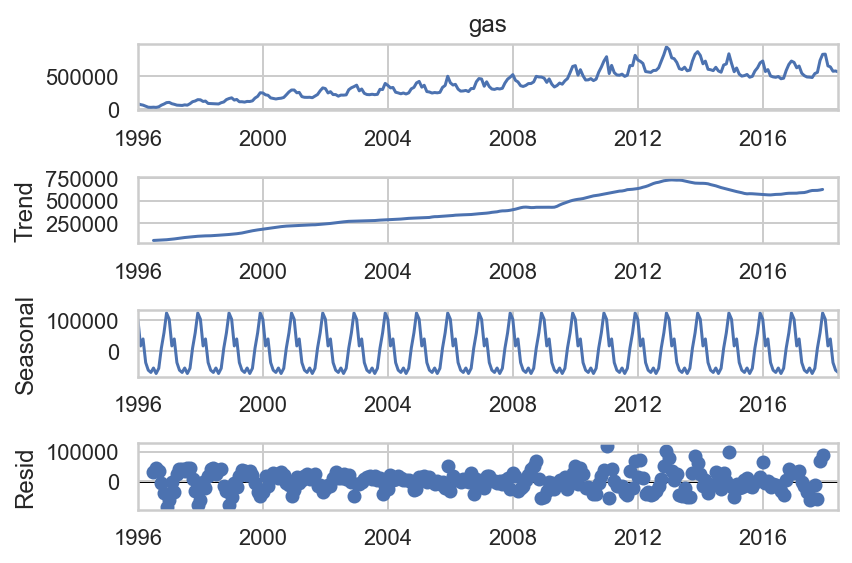

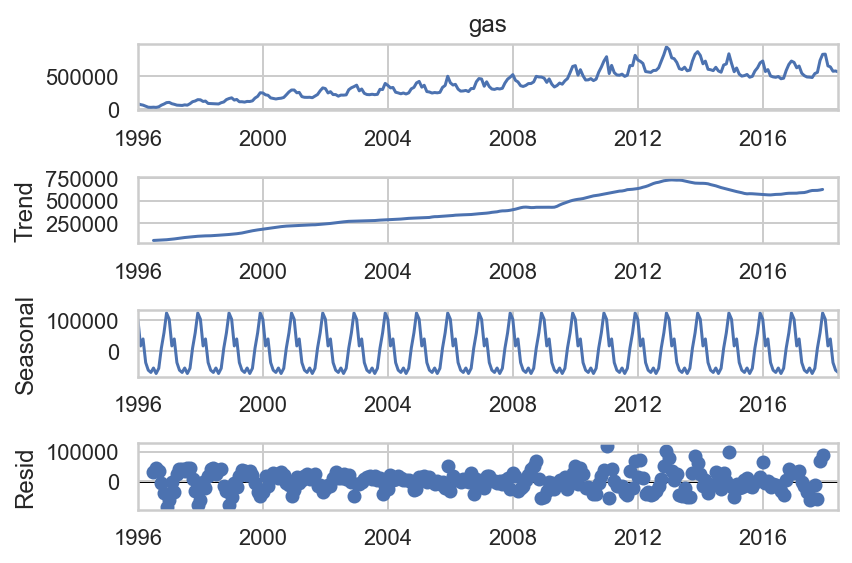

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(gas_train, model="additive")
decompose_data.plot()

<AxesSubplot:xlabel='ID'>

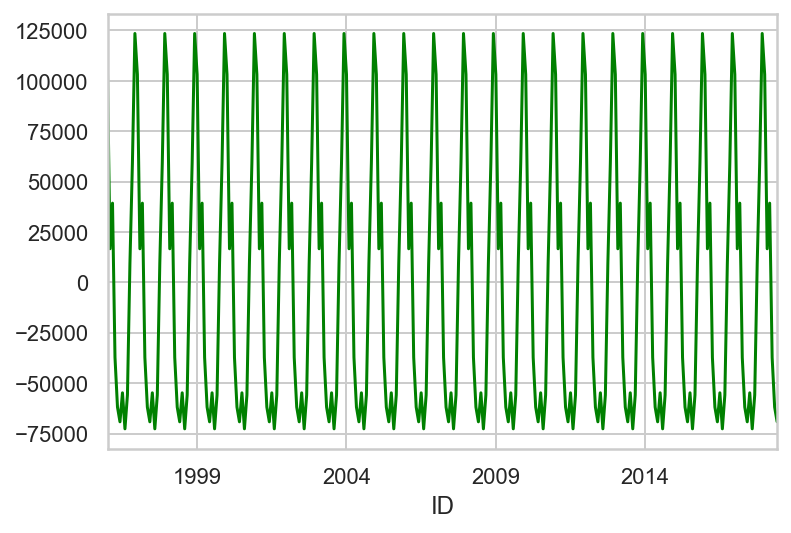

In [32]:
seasonality = decompose_data.seasonal
seasonality.plot(color='green')

In [33]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(gas_train, autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)
#p-value 0.05보다 크므로 비정상 시계열

1. ADF :  -1.2213777956719374
2. P-Value :  0.6643325875044728
3. Num of Lags :  15
4. Num of Observations used for ADF Regression and Critical Values Calculation :  254
5. Critical Values : 
	 1% :  -3.456360306409983
	 5% :  -2.8729872043802356
	 10% :  -2.572870232500465


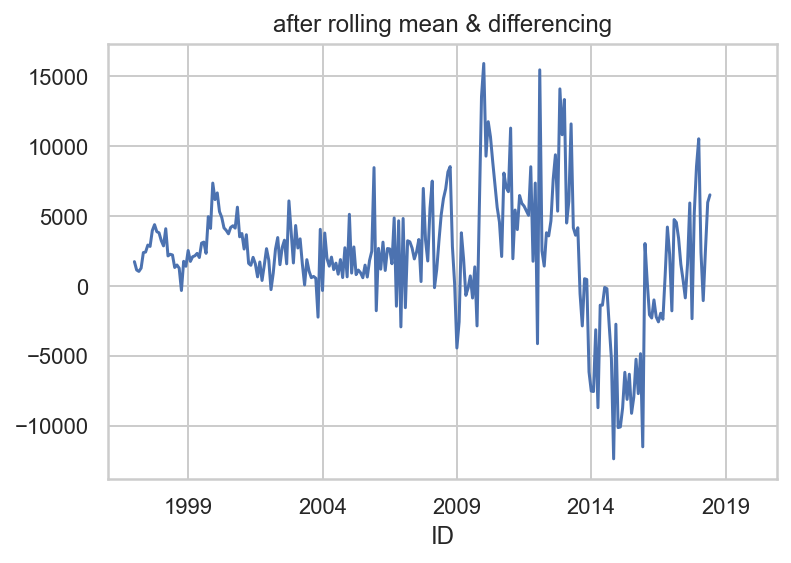

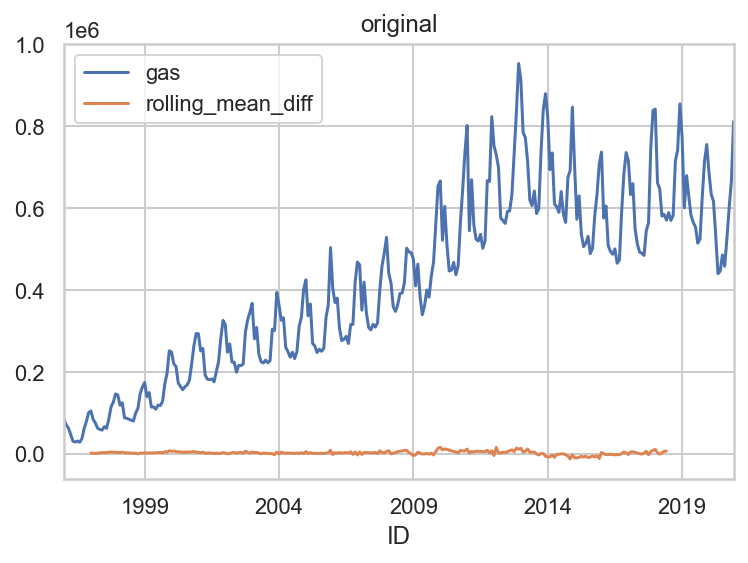

In [34]:
rolling_mean = gas_train.rolling(window=12).mean()
ind['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
ind['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
ind.plot(title='original');

In [35]:
dftest = adfuller(ind['rolling_mean_diff'].dropna(), autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. ADF :  -2.5224860537906904
2. P-Value :  0.11009864000106578
3. Num of Lags :  14
4. Num of Observations used for ADF Regression and Critical Values Calculation :  243
5. Critical Values : 
	 1% :  -3.4575505077947746
	 5% :  -2.8735087323013526
	 10% :  -2.573148434859185


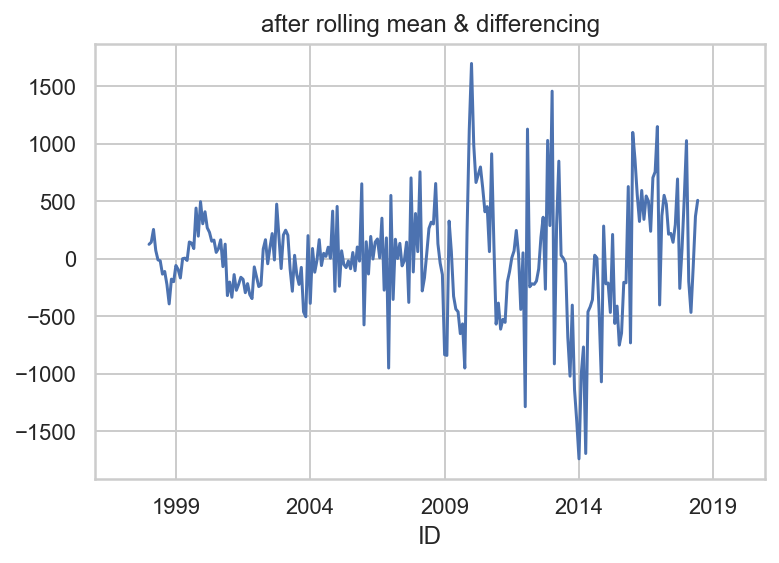

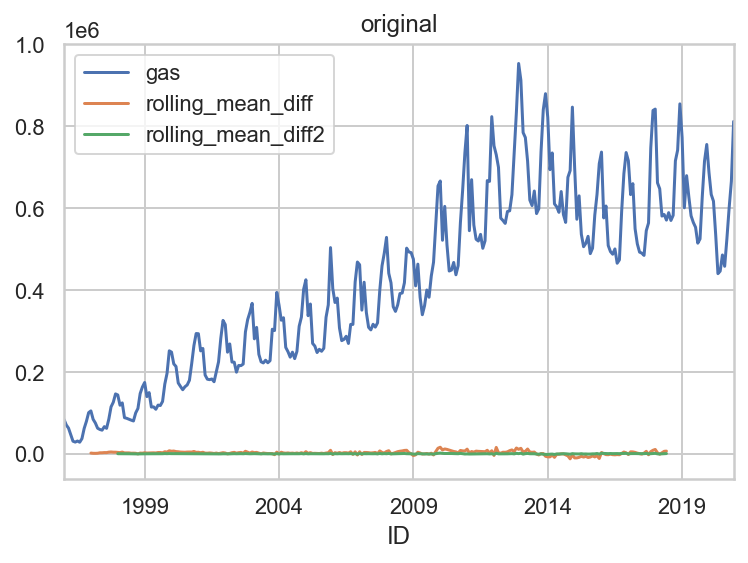

In [36]:
rolling_mean = ind['rolling_mean_diff'].rolling(window=12).mean()
ind['rolling_mean_diff2'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
ind['rolling_mean_diff2'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
ind.plot(title='original');

In [37]:
dftest = adfuller(ind['rolling_mean_diff2'].dropna(), autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. ADF :  -2.758092759752457
2. P-Value :  0.06451374061111535
3. Num of Lags :  15
4. Num of Observations used for ADF Regression and Critical Values Calculation :  230
5. Critical Values : 
	 1% :  -3.459105583381277
	 5% :  -2.8741898504150574
	 10% :  -2.5735117958412097


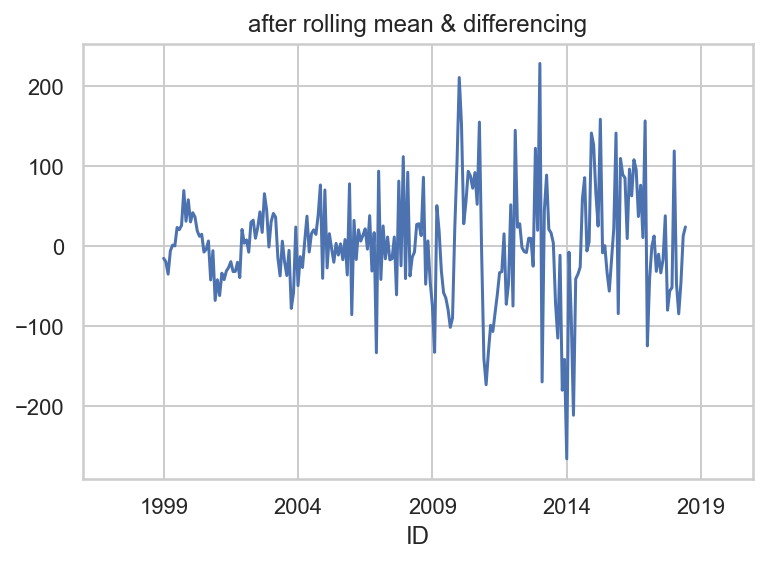

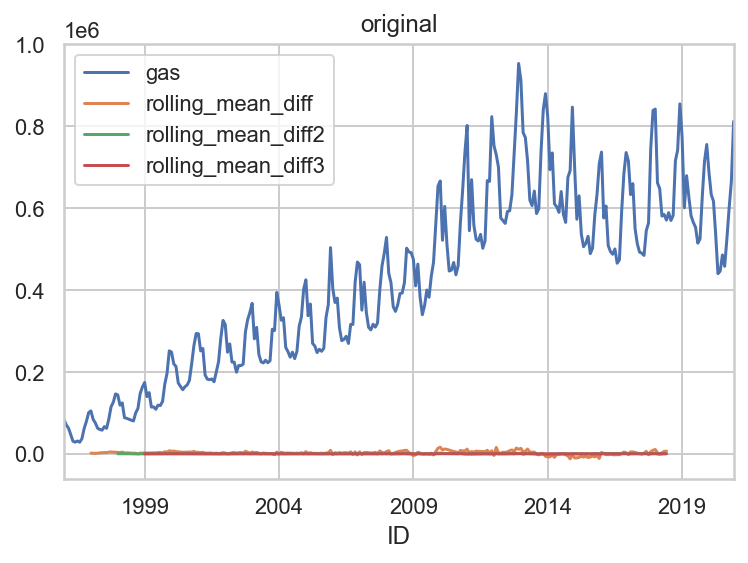

In [38]:
rolling_mean = ind['rolling_mean_diff2'].rolling(window=12).mean()
ind['rolling_mean_diff3'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
ind['rolling_mean_diff3'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
ind.plot(title='original');

In [39]:
dftest = adfuller(ind['rolling_mean_diff3'].dropna(), autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. ADF :  -3.5194506768948983
2. P-Value :  0.0075013871594324984
3. Num of Lags :  15
4. Num of Observations used for ADF Regression and Critical Values Calculation :  218
5. Critical Values : 
	 1% :  -3.460707667106296
	 5% :  -2.874891213486339
	 10% :  -2.573885987711472


In [40]:
ind.index = pd.DatetimeIndex(ind.index.values,
                               freq=ind.index.inferred_freq)

In [41]:
gas_train.index = pd.DatetimeIndex(gas_train.index.values, freq=gas_train.index.inferred_freq)
gas_train

1996-01-01     83809.0
1996-02-01     70427.0
1996-03-01     62652.0
1996-04-01     47050.0
1996-05-01     30709.0
                ...   
2018-02-01    661919.0
2018-03-01    647226.0
2018-04-01    580667.0
2018-05-01    584369.0
2018-06-01    570856.0
Freq: MS, Name: gas, Length: 270, dtype: float64

In [42]:
from pmdarima.arima import auto_arima
auto_arima_model = auto_arima(gas_train,
                              start_p=0, max_p=5, 
                              start_q=0, max_q=5, 
                              seasonal=True,
                              d=3, m=12,
                              trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=False)
auto_arima_model

 ARIMA(0,3,0)(0,0,0)[12]             : AIC=7101.104, Time=0.04 sec
 ARIMA(0,3,0)(0,0,1)[12]             : AIC=7070.486, Time=0.06 sec
 ARIMA(0,3,0)(0,0,2)[12]             : AIC=7073.219, Time=0.11 sec
 ARIMA(0,3,0)(1,0,0)[12]             : AIC=7028.663, Time=0.06 sec
 ARIMA(0,3,0)(1,0,1)[12]             : AIC=6982.610, Time=0.13 sec
 ARIMA(0,3,0)(1,0,2)[12]             : AIC=6998.524, Time=0.23 sec
 ARIMA(0,3,0)(2,0,0)[12]             : AIC=6997.050, Time=0.11 sec
 ARIMA(0,3,0)(2,0,1)[12]             : AIC=6973.143, Time=0.23 sec
 ARIMA(0,3,0)(2,0,2)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,3,1)(0,0,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(0,3,1)(0,0,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,3,1)(0,0,2)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,3,1)(1,0,0)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,3,1)(1,0,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,3,1)(1,0,2)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,3,1)(2,0,0)[12]      

ARIMA(order=(1, 3, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [43]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(gas_train, order=(1,3,2), seasonal_order=(1,0,1,12))
results = model.fit()

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  gas   No. Observations:                  270
Model:             SARIMAX(1, 3, 2)x(1, 0, [1], 12)   Log Likelihood               -3291.836
Date:                              Wed, 12 Oct 2022   AIC                           6595.671
Time:                                      01:05:01   BIC                           6617.195
Sample:                                  01-01-1996   HQIC                          6604.317
                                       - 06-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3833      0.233     -1.643      0.100      -0.841       0.074
ma.L1         -1.9176      0.186    -10.301      0.000      -2.282      -1.553
ma.L2          0.9202      0.193      4.757      0.000       0.541       1.299
ar.S.L12       0.9360      0.094      9.975      0.000       0.752       1.120
ma.S.L12      -0.5675      0.290     -1.960      0.050      -1.135   -4.78e-05
sigma2      6.359e+09   1.56e-11   4.06e+20      0.000    6.36e+09    6.36e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                42.37
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               6.75   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.3e+37. Standard errors may be unstable.
"""

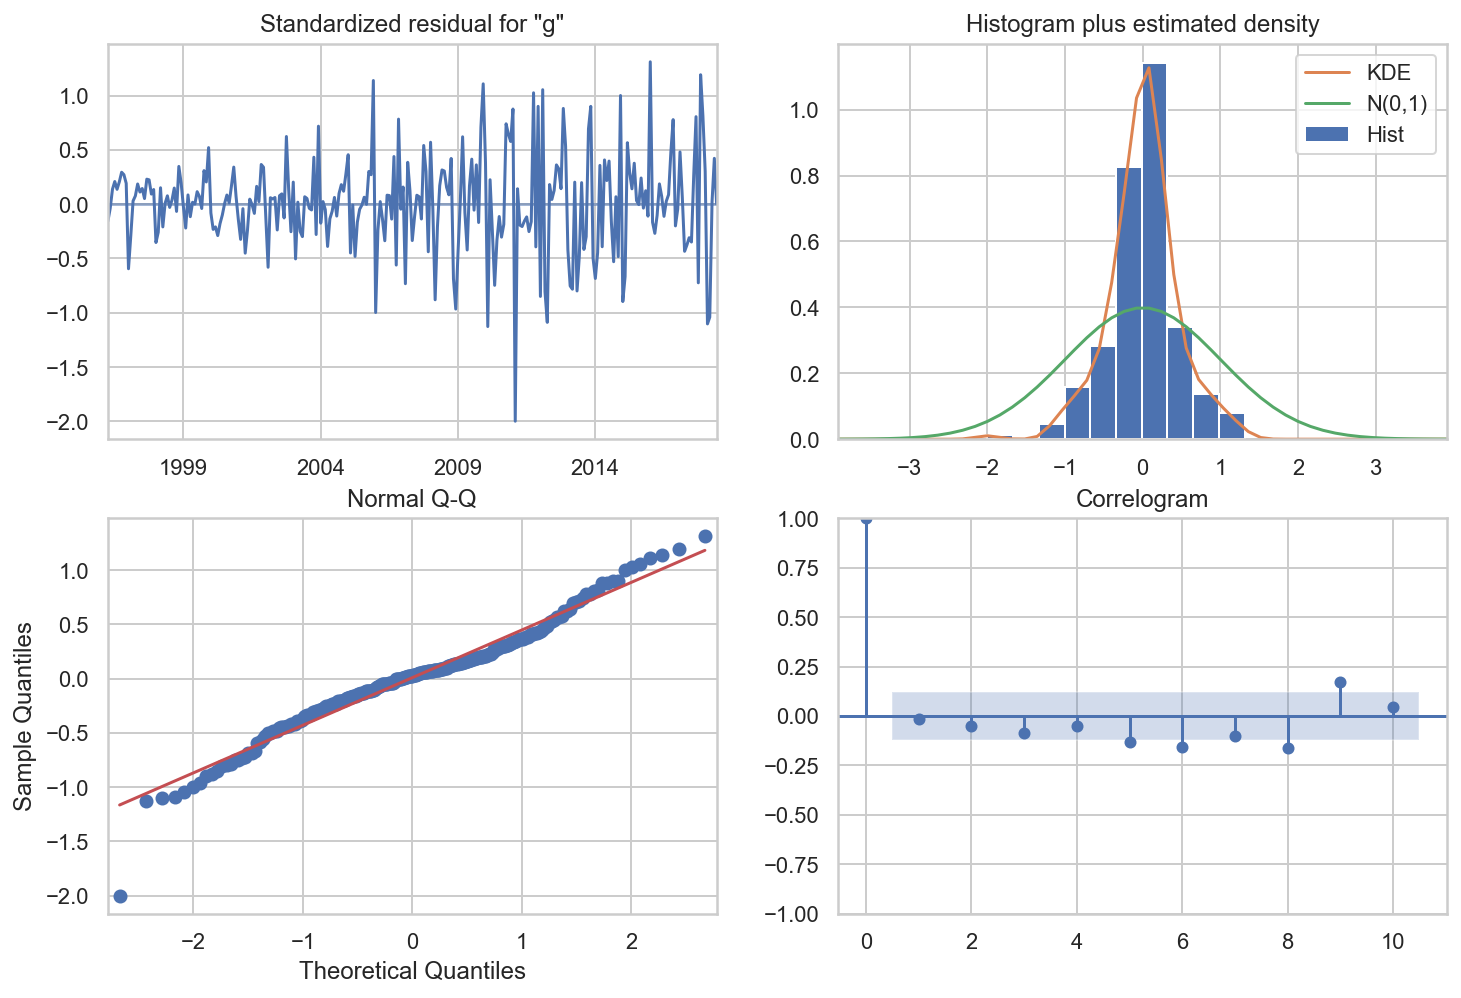

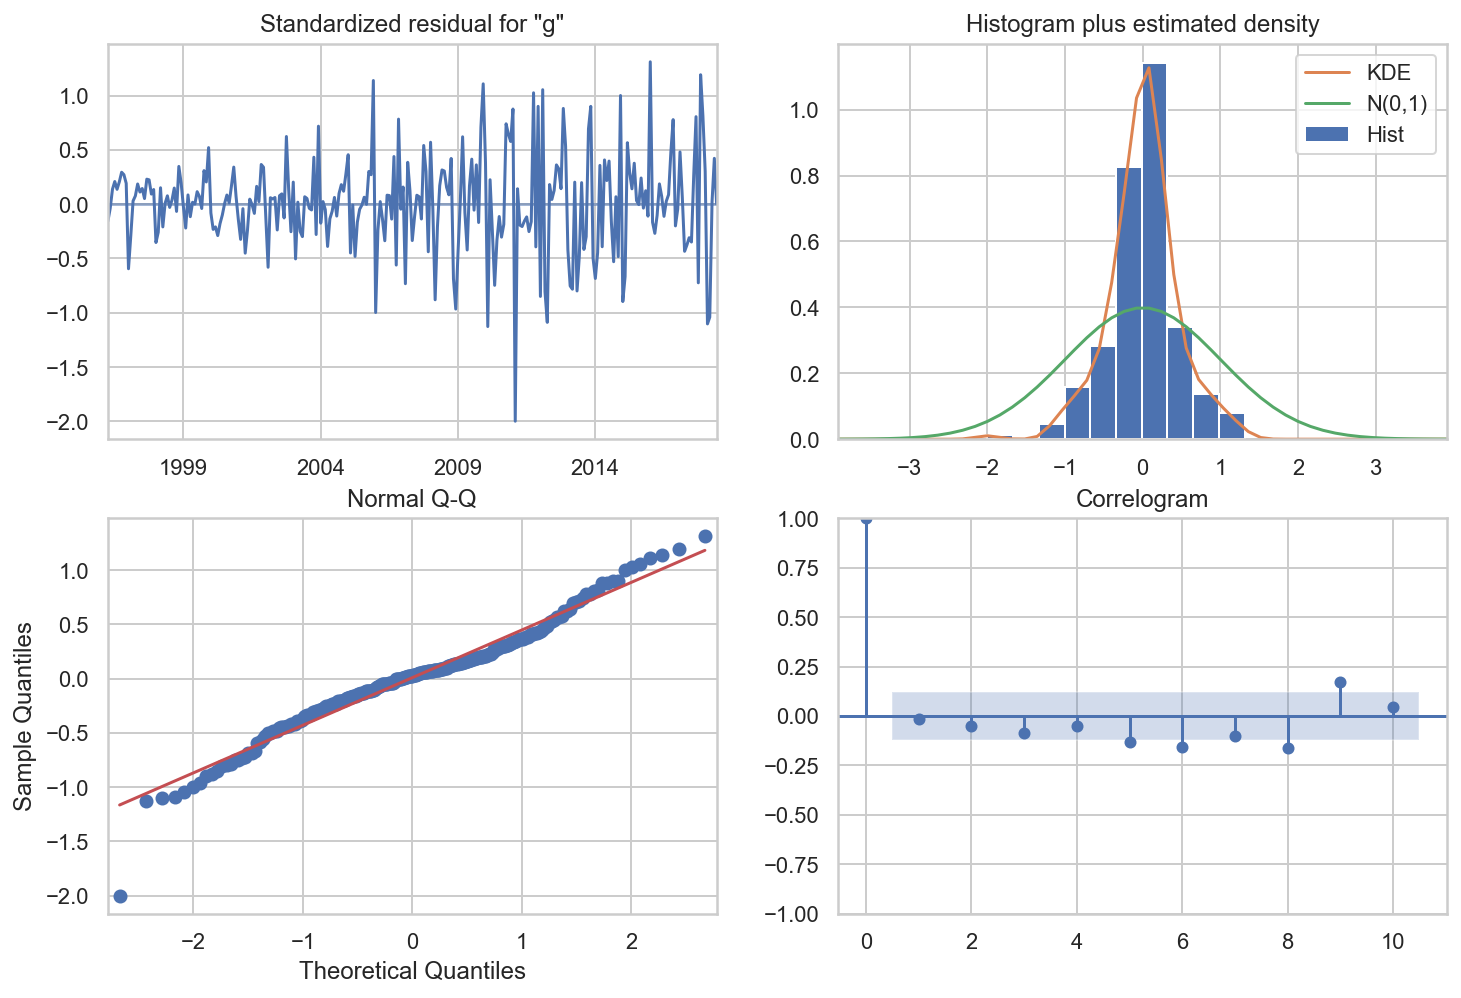

In [45]:
results.plot_diagnostics(figsize=(12,8))

<AxesSubplot:>

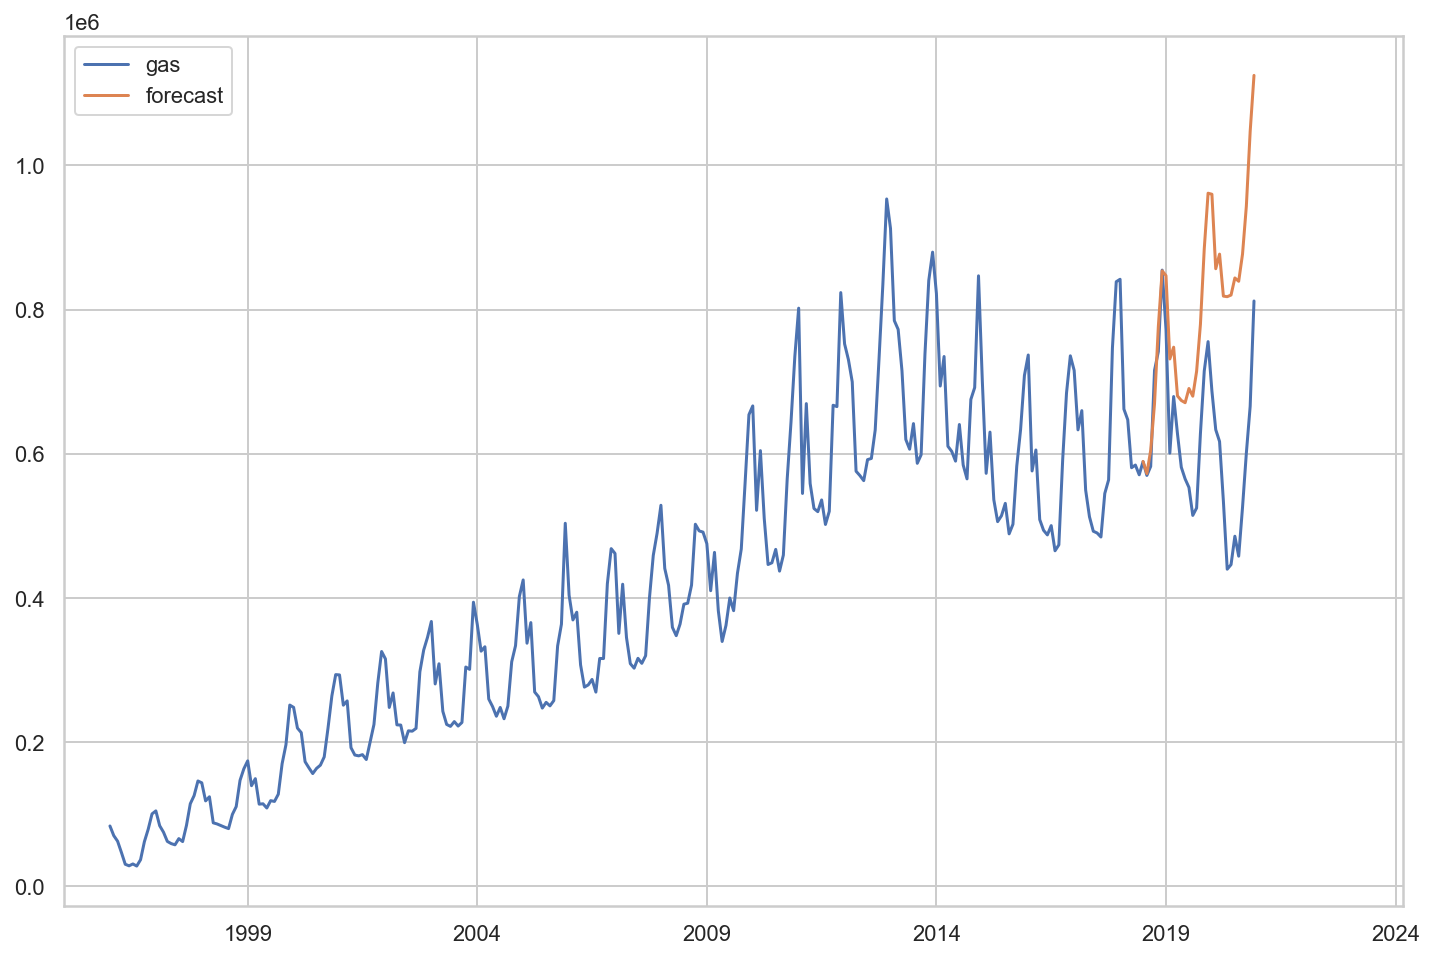

In [46]:
ind['forecast']=results.predict(start=270, end=299, dynamic=True)
ind[['gas','forecast']].plot(figsize=(12,8), xlim=[300,650])

In [47]:
from pandas.tseries.offsets import DateOffset
pred_date = [ind.index[-1] + DateOffset(months=x) for x in range(0,169)]

In [48]:
pred_date = pd.DataFrame(index=pred_date[1:], columns=ind.columns)
pred_date.head()

,gas,rolling_mean_diff,rolling_mean_diff2,rolling_mean_diff3,forecast
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN


In [49]:
ind = pd.concat([ind, pred_date])

<AxesSubplot:>

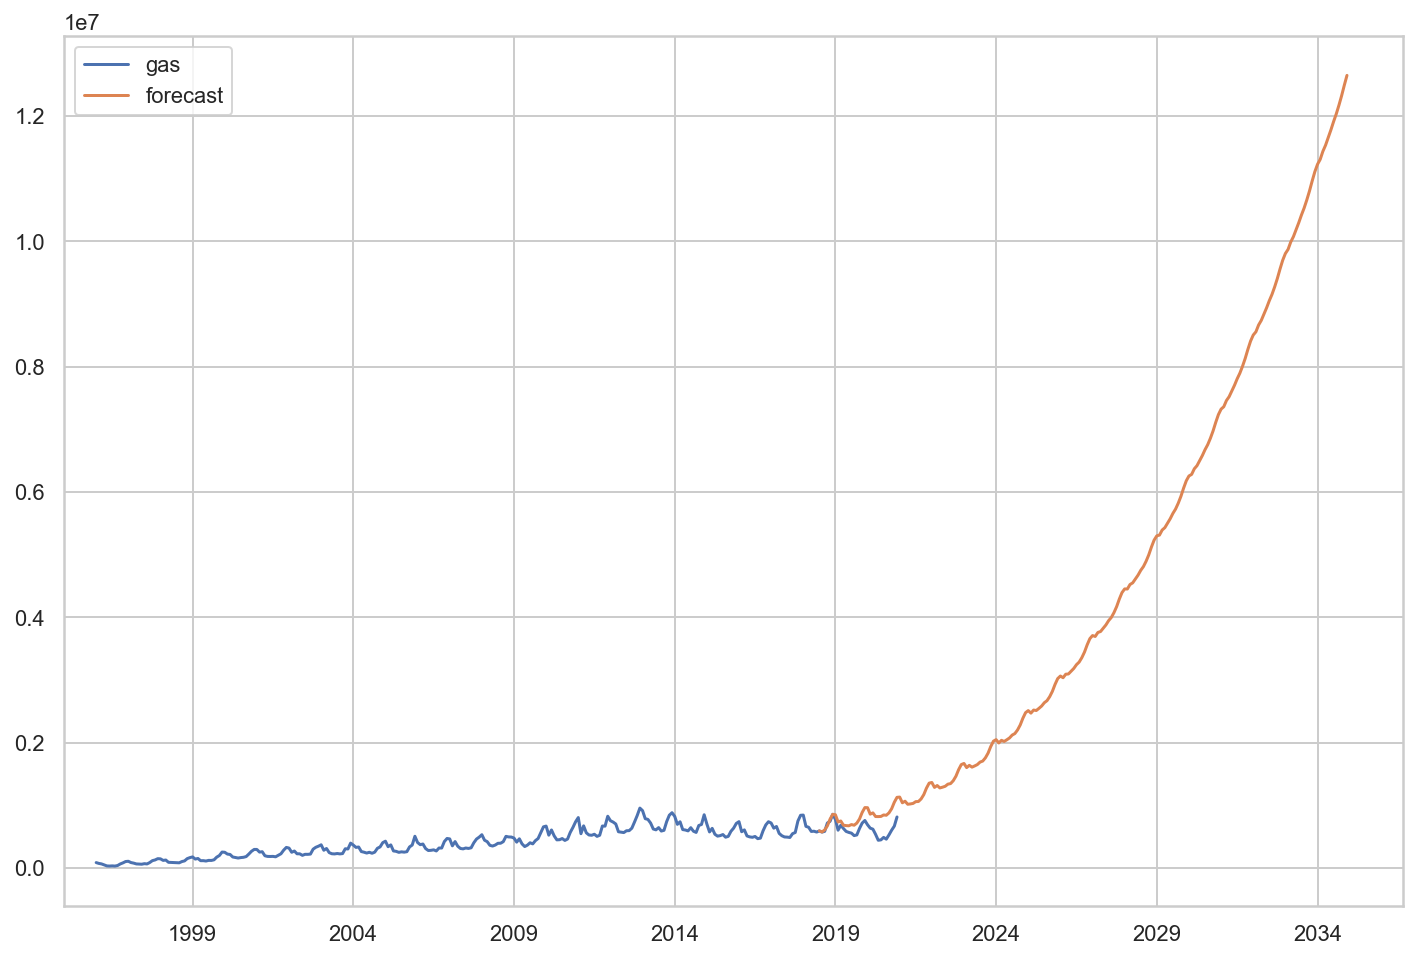

In [50]:
ind['forecast'] = results.predict(start=270, end=469, dynamic=True)
ind[['gas', 'forecast']].plot(figsize=(12,8), xlim=[300,800])

In [25]:
ind

,gas,rolling_mean_diff,rolling_mean_diff2,forecast
1996-01-01,83809.0,NaN,NaN,NaN
1996-02-01,70427.0,NaN,NaN,NaN
1996-03-01,62652.0,NaN,NaN,NaN
1996-04-01,47050.0,NaN,NaN,NaN
1996-05-01,30709.0,NaN,NaN,NaN
...,...,...,...,...
2034-08-01,NaN,NaN,NaN,2.436573e+06
2034-09-01,NaN,NaN,NaN,2.443586e+06
2034-10-01,NaN,NaN,NaN,2.450767e+06
2034-11-01,NaN,NaN,NaN,2.457972e+06


In [ ]:
ind.to_csv("sarima_ind.csv", mode='w')